# **TASK 2**

<h2> PERFORMING EDA AND EXPLORING TRENDS, PATTERNS AND RELATIONSHIPS BETWEEN VARIABLES IN THE FIFA 19 DATASET </h2>

In [6]:
#Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use('fivethirtyeight')

# to visualize missing data
import missingno as msno

In [7]:
# adjust figure size
plt.rcParams['figure.figsize'] = (12,8)

<h3> The <a href="https://www.kaggle.com/datasets/winterbreeze/fifa19eda">FIFA19</a> Dataset from Kaggle has been used for analysis </h3>

In [11]:
# Reading the dataset
df = pd.read_csv("C:/Users/nisha/OneDrive/Desktop/DS/dataset2.csv")

In [13]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value (USD),Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500,565,Left,5,4,RF,2004,01-01-2021,5.583333,159,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000,405,Left,5,5,ST,2018,01-01-2022,6.166667,183,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500,290,Left,5,5,LW,2017,01-01-2022,5.750000,150,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000,260,Left,4,1,GK,2011,01-01-2020,6.333333,168,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000,355,Left,4,4,RCM,2015,01-01-2023,5.916667,154,196400.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      74 non-null     object 
 1   Age                       74 non-null     int64  
 2   Nationality               74 non-null     object 
 3   Overall                   74 non-null     int64  
 4   Potential                 74 non-null     int64  
 5   Club                      74 non-null     object 
 6   Value (USD)               74 non-null     int64  
 7   Wage                      74 non-null     int64  
 8   Preferred Foot            74 non-null     object 
 9   International Reputation  74 non-null     int64  
 10  Skill Moves               74 non-null     int64  
 11  Position                  74 non-null     object 
 12  Joined                    74 non-null     int64  
 13  Contract Valid Until      74 non-null     object 
 14  Height      

<h2> 1. Cleaning the dataset </h2>

In [20]:
# Searching for any null values present in the dataset
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value (USD)                 0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

<h3> There are no null values in the dataset</h3>


<h3> There were Unicode Characters present in the CSV file, which were manually cleaned </h3>

<h2> 2. Visualising the Data</h2>

<h3> Distribution of Preferred Foot</h3>

In [16]:
df['Preferred Foot'].value_counts()

Preferred Foot
Left     56
Right    18
Name: count, dtype: int64

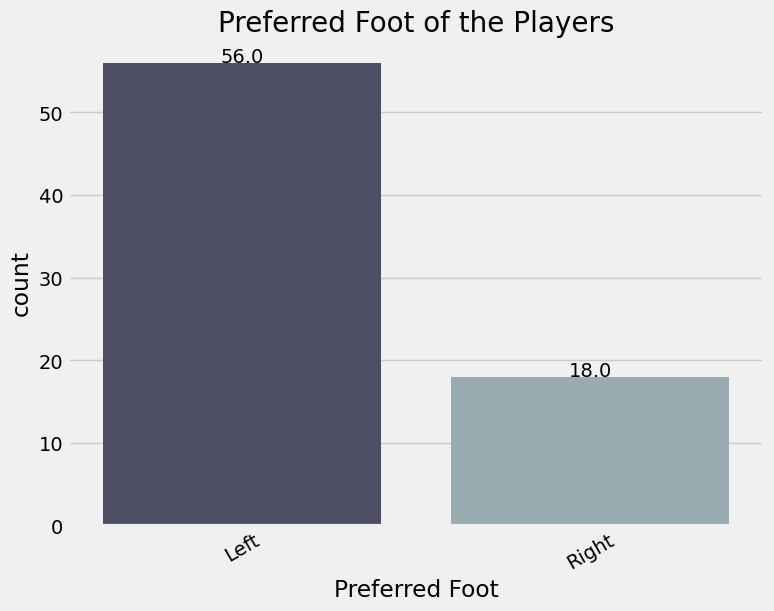

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
graph = sns.countplot(ax=ax,x=df['Preferred Foot'], data=df, palette = 'bone')
graph.set_title('Preferred Foot of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(),rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [44]:
df['Preferred Foot'].value_counts()/len(df)

Preferred Foot
Left     0.756757
Right    0.243243
Name: count, dtype: float64

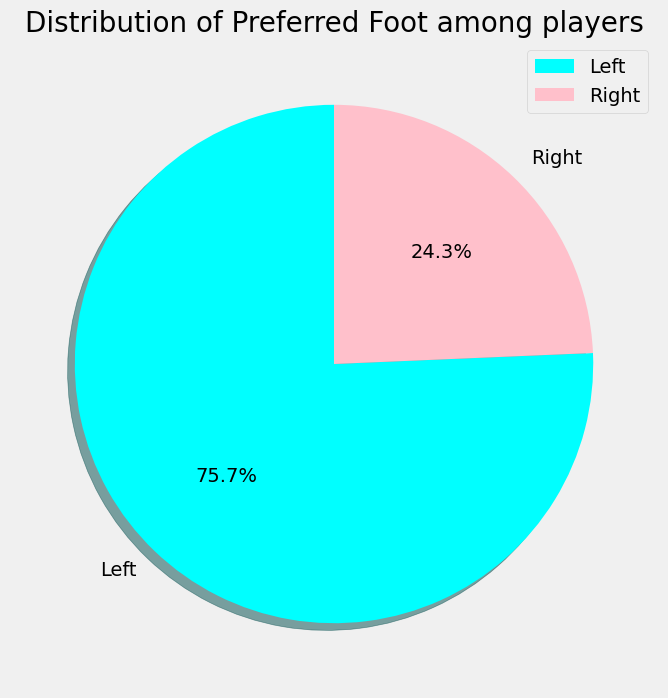

In [46]:
labels = df['Preferred Foot'].value_counts().index
size = df['Preferred Foot'].value_counts()
colors=['cyan','pink']
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct='%1.1f%%',startangle = 90)
plt.title('Distribution of Preferred Foot among players', fontsize = 20)
plt.legend()
plt.show()

<h3> Around 3/4th of the players prefer their Left Foot over their Right Foot</h3>

<h3> Age Distribution</h3>

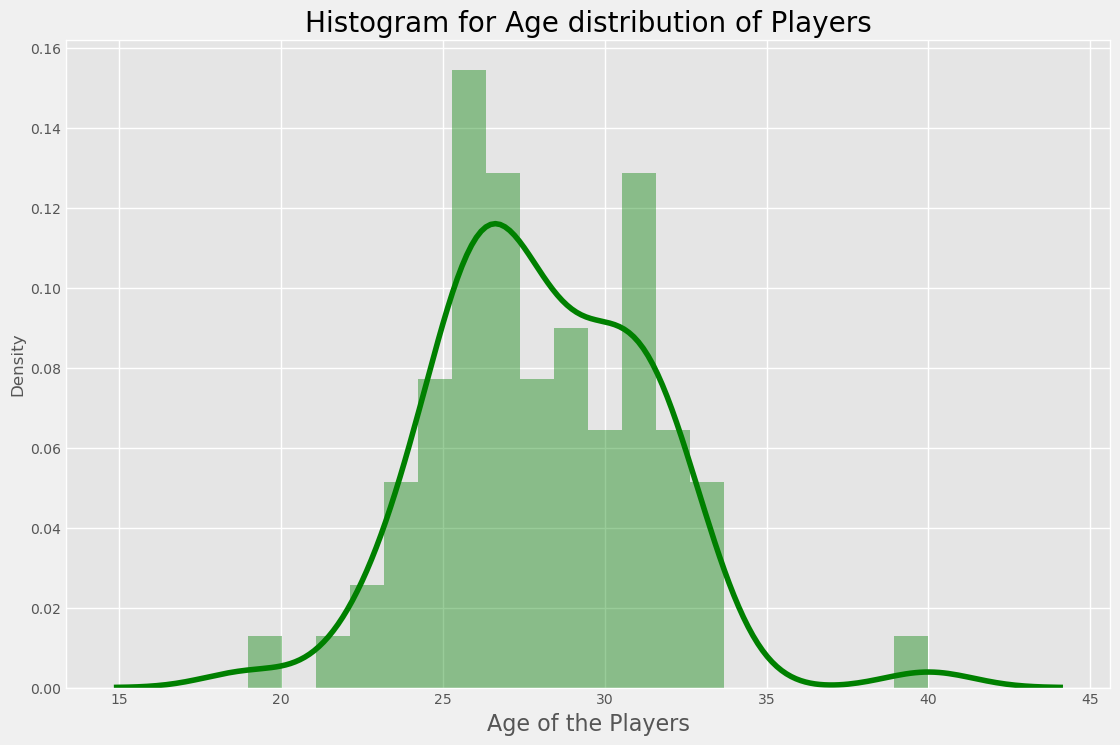

In [48]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sns.distplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()

<h3> Most of the players lie in the range of 26-27 years </h3>

<h3> Distribution of Skill Moves</h3>

<Axes: xlabel='Skill Moves', ylabel='count'>

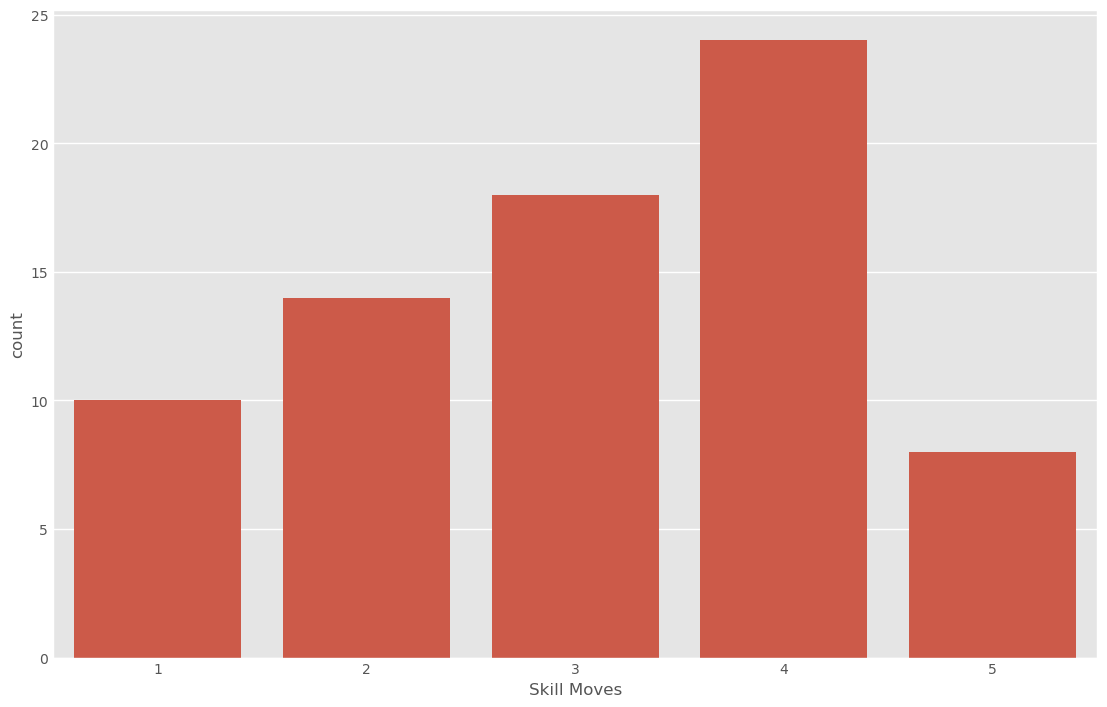

In [50]:
sns.countplot(x='Skill Moves',data=df)

<h3> 4 star Skill Moves are seen most amongst players in the game. We can also check if the Preferred Foot of a player effects the Skill Move rating of a player </h3>

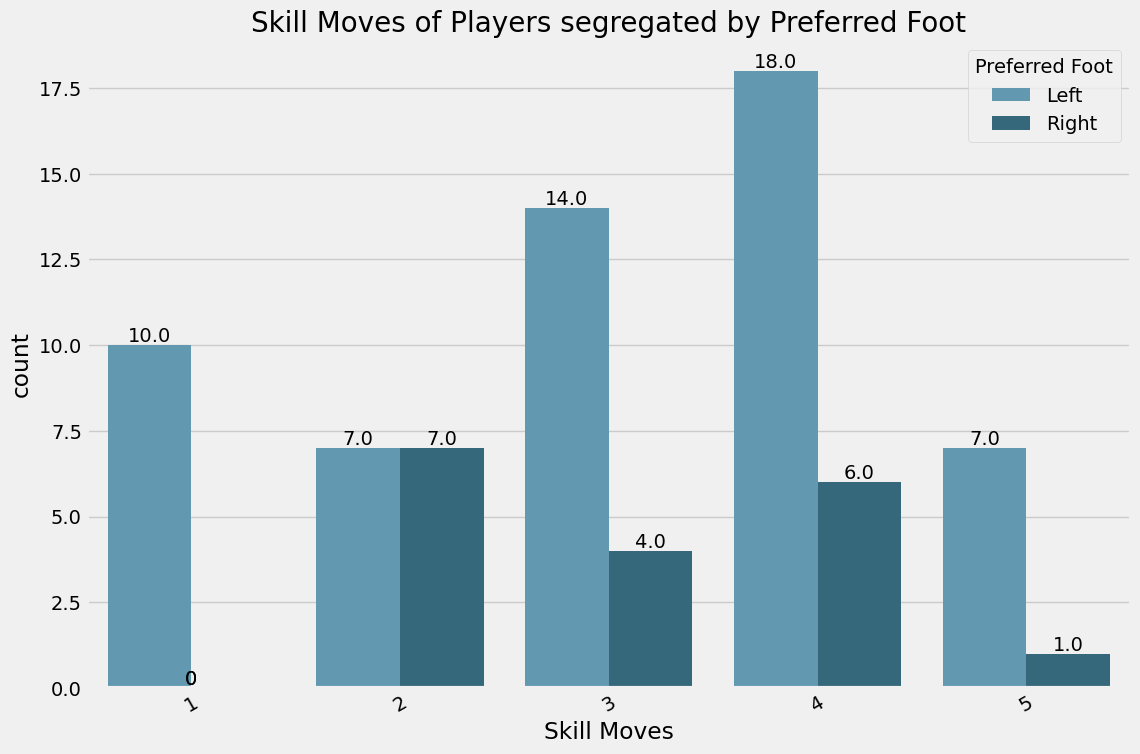

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot', palette = 'PuBuGn_d')
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<h3> Nationality Distribution </h3>

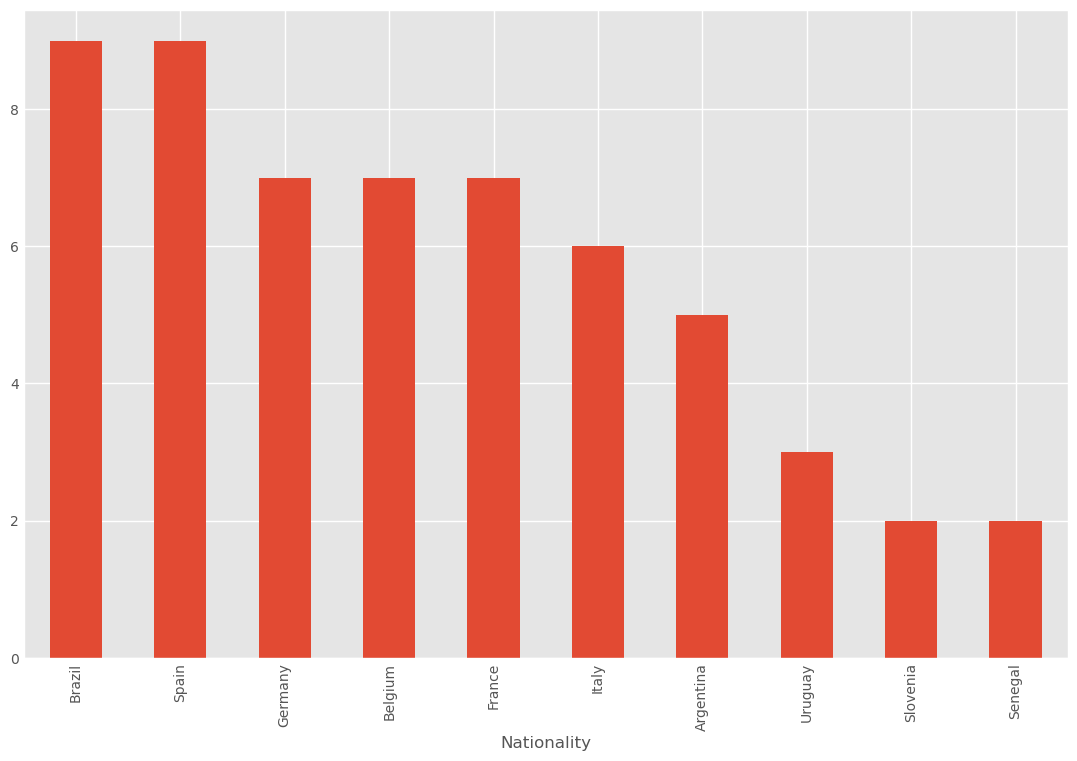

In [52]:
national = df['Nationality'].value_counts()[:10]
national.plot.bar()
plt.show()

<h3> Most of the players in the sample dataset belong to Brazil and Spain. We can check if most of the top rated players belong to these countries  </h3>

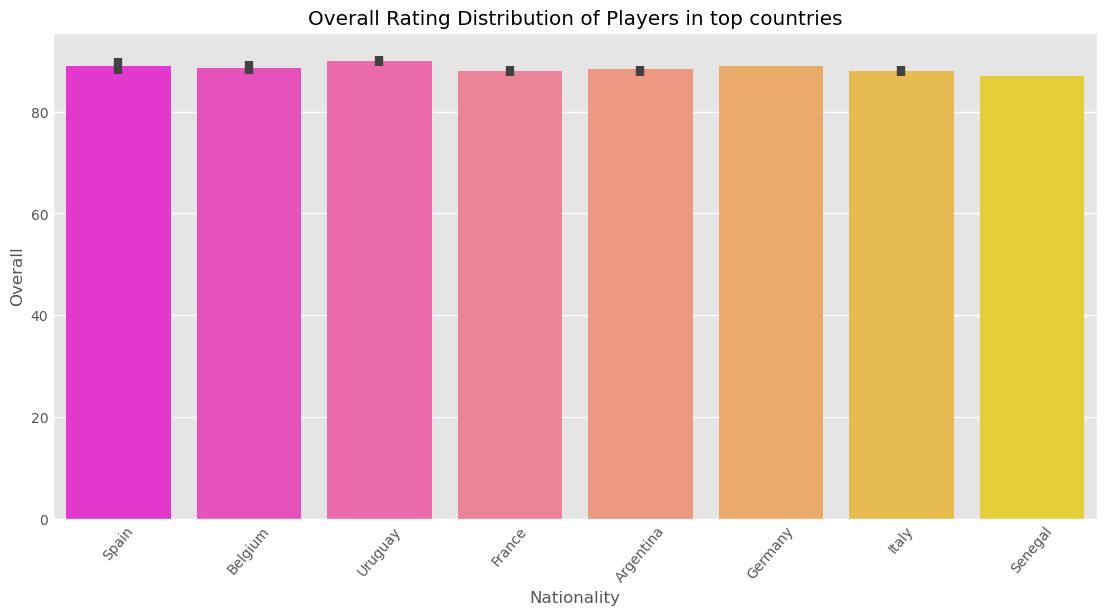

In [60]:
top_countries = df['Nationality'].value_counts().head(10)

top_countries
top_countries_name = top_countries.index

top_countries_name
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating, palette='spring')
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

<h3> Most of the Top Rated players belong to Spain, Belgium, Uruguay, Argentina, France and Germany. Even countries with very few players like Senegal are on the list meaning their players in the dataset are quite high rated, while Brazil, which has the joint most players in the dataset does not show up in the Top 8, indicating their low overall players present in the dataset</h3>

<h3> Distribution of International Reputation</h3>

<Axes: xlabel='International Reputation', ylabel='count'>

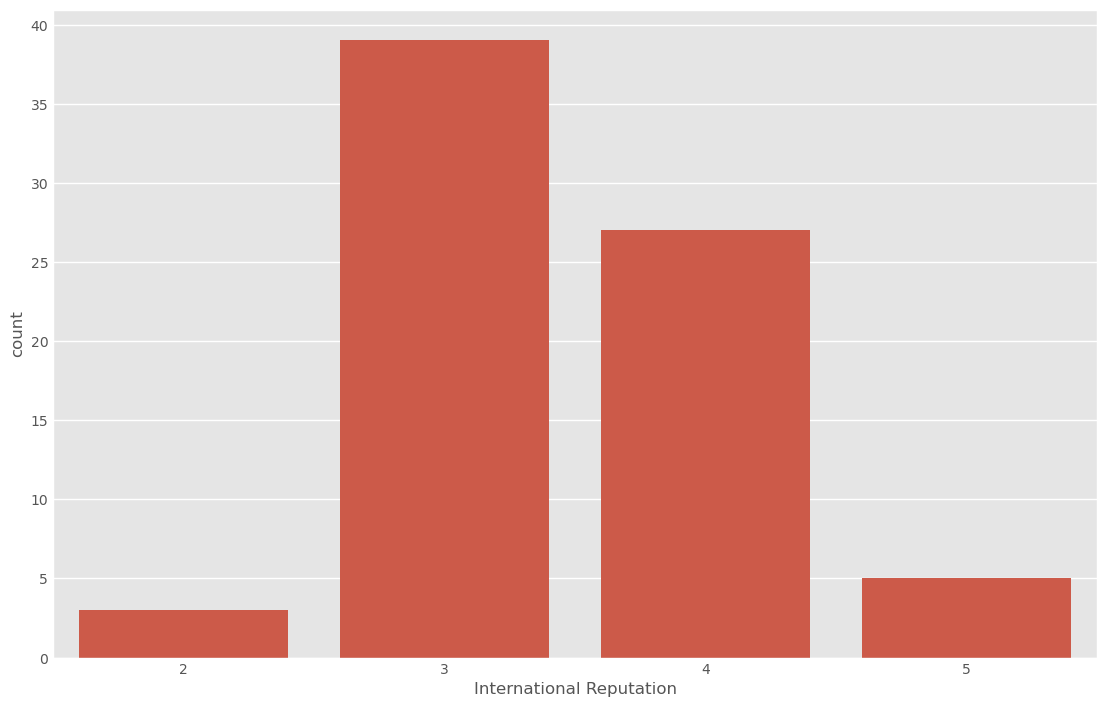

In [64]:
sns.countplot(x='International Reputation',data=df)

<h3> Majority of the players have an International Reputation of 3 Stars </h3>

<h3> Distribution of Players by their Clubs </h3>

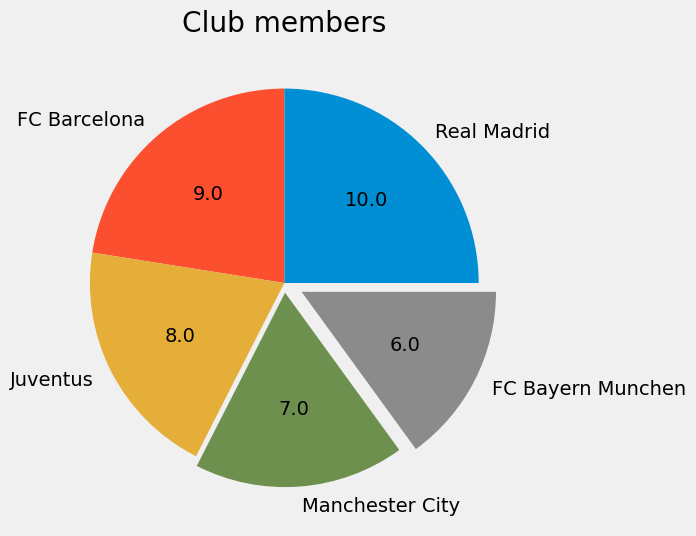

In [45]:
plt.subplots(figsize=(6,6))
size = df["Club"].value_counts().sort_values(ascending = False).head(5)
def value(val):
               x = np.round(val/100.*size.sum())
               return x
plt.pie(size, labels = size.index, autopct = value, explode=[0,0,0,0.05,0.1])
plt.title("Club members")
plt.show()

<h3>Bulk of the players belong to the World Famous Clubs including FC Barcelona and Real Madrid </h3>

<h3> Finding out the relation and patterns between Value, Wage and Release Clause (USD)</h3>

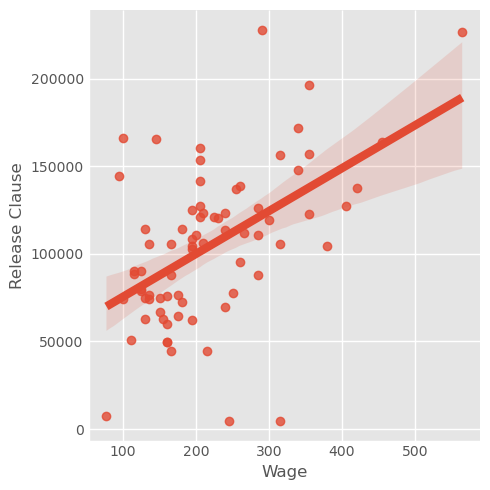

In [66]:
sns.lmplot(x='Wage',y='Release Clause',data=df)

<h3> There is positive linear co-relation between the Wage and Release Clause of a player, indicating Clubs are wary of releasing players who are given high wages. This may also indicate a positive co-relation between the Value and Wage of a player </h3>

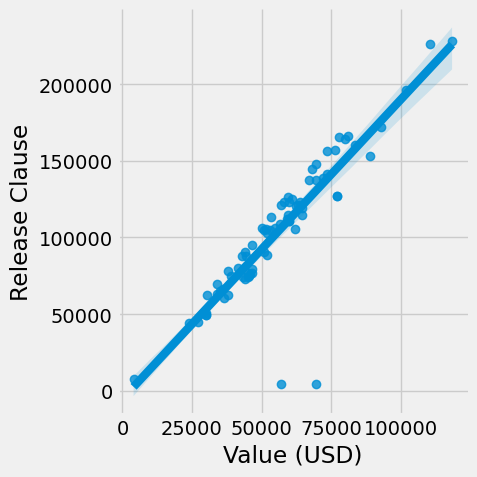

In [28]:
sns.lmplot(x='Value (USD)',y='Release Clause',data=df)

<h3>We observe a textbook positive linear co-relation between Value and Release Clause, further supporting our previous conclusion. </h3>

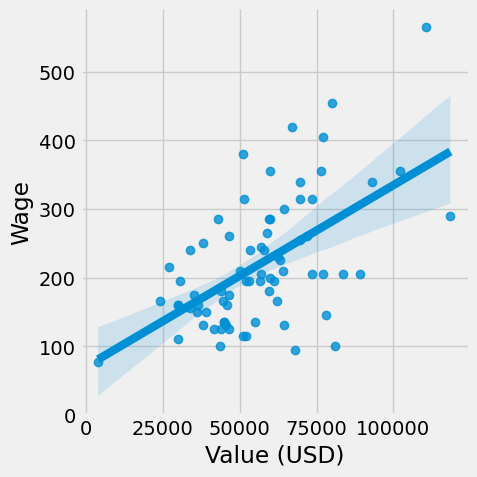

In [30]:
sns.lmplot(x='Value (USD)',y='Wage',data=df)

<h3> There also lies a positive co-relation between Value and Wage, indicating Clubs are more likely to give higher Wages to players with higher Net Values. </h3>

<h3> Finally, finding out the best players in the game, sorted by their overall ratings </h3>

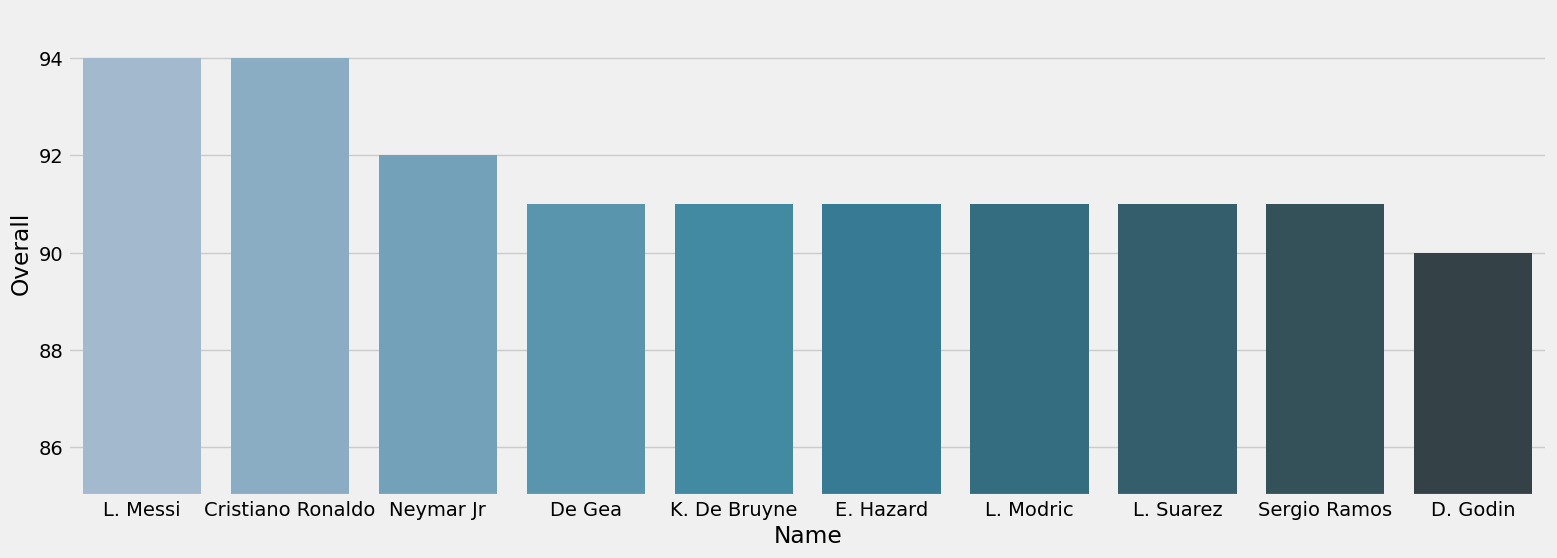

In [38]:
df_best_players = pd.DataFrame.copy(df.sort_values(by ='Overall',ascending = False ).head(10))
plt.figure(1,figsize = (17,6))
sns.barplot(x ='Name' , y = 'Overall' , data = df_best_players, palette='PuBuGn_d')
plt.ylim(85,95)
plt.show()

<h3>Lionel Messi, Cristiano Ronaldo and Neymar Jr, all forwards, are the best players in the game, followed by Goalkeeper David De Gea. </h3>